In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df_custom = pd.read_csv('../../data/custom_features2.csv')
df_cus_og = pd.read_csv('../../data/custom_and_og.csv')

## KNN on cutom dataset

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_custom), columns=df_custom.columns)

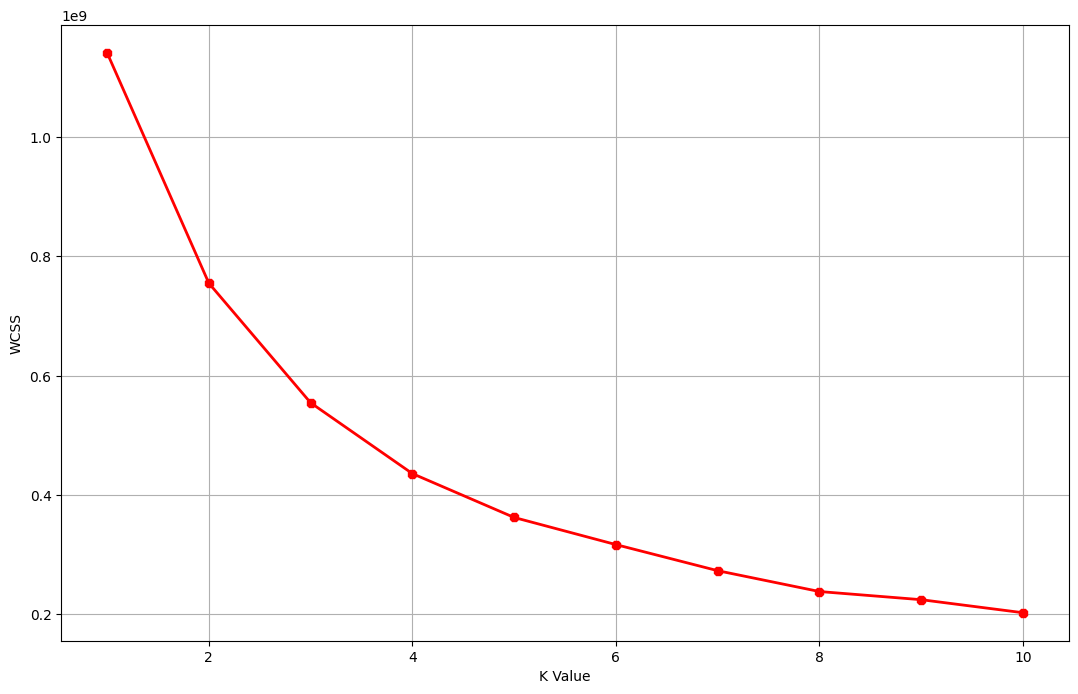

In [120]:
from sklearn.cluster import KMeans


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_custom)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(13, 8))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [121]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_custom['Cluster'] = kmeans.fit_predict(df_custom)

In [122]:
from sklearn.metrics import silhouette_score

# Prepare data
X = df_custom.drop(columns='Cluster')  # Features
y = df_custom['Cluster']  # Cluster labels

# Calculate scores
silhouette_avg = silhouette_score(X, y)

print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.566


In [123]:
df1 = pd.read_csv("../../data/dataset_cleaned.csv")
df1['Cluster'] = df_custom['Cluster'].copy()

In [124]:
df1["Cluster"].value_counts()

Cluster
1    6966
0    1040
3     865
2      79
Name: count, dtype: int64

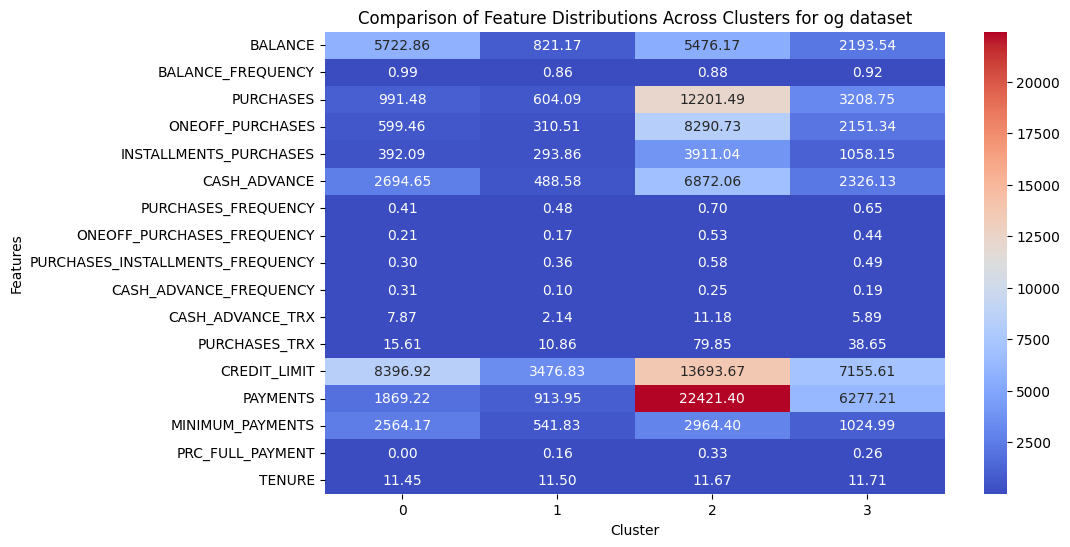

In [125]:
df_clustered_means = df1.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(df_clustered_means.T, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Comparison of Feature Distributions Across Clusters for og dataset')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()


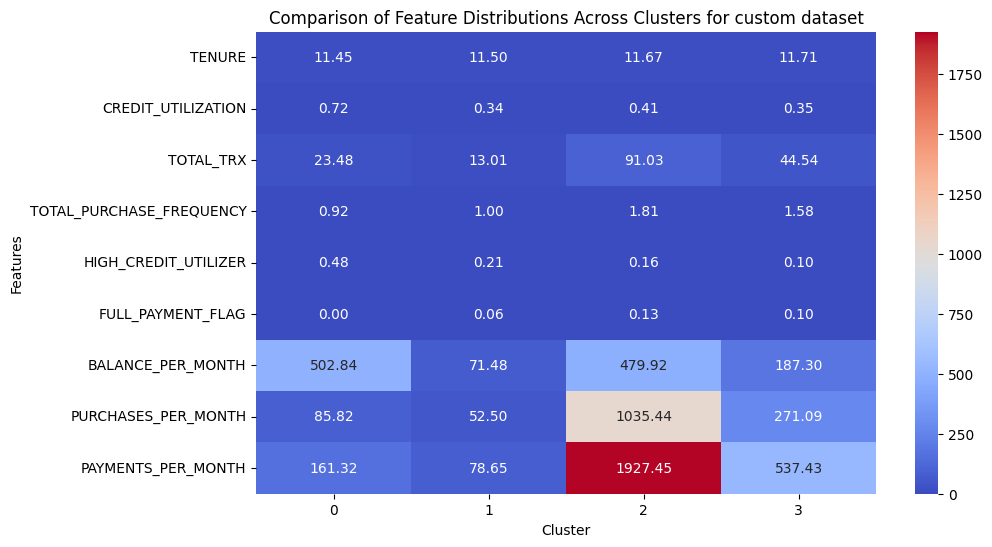

In [126]:

df_clustered_means = df_custom.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(df_clustered_means.T, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Comparison of Feature Distributions Across Clusters for custom dataset')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()

## KNN on mixed data

In [127]:
df_cus_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

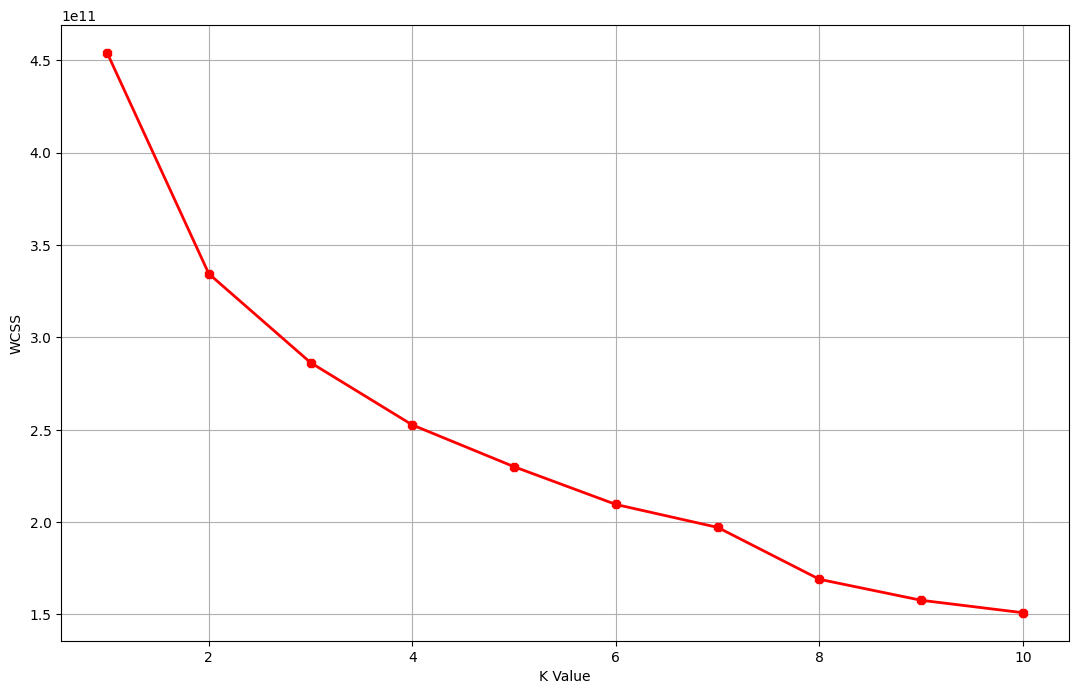

In [128]:
from sklearn.cluster import KMeans


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_cus_og)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(13, 8))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [129]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_cus_og['Cluster'] = kmeans.fit_predict(df_cus_og)

In [130]:
from sklearn.metrics import silhouette_score

# Prepare data
X = df_cus_og.drop(columns='Cluster')  # Features
y = df_cus_og['Cluster']  # Cluster labels

# Calculate scores
silhouette_avg = silhouette_score(X, y)

print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.248


## PCA using original dataset

In [131]:
df = pd.read_csv("../../data/dataset_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [132]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [133]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2', 'PCA3'])

In [134]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA1    8950 non-null   float64
 1   PCA2    8950 non-null   float64
 2   PCA3    8950 non-null   float64
dtypes: float64(3)
memory usage: 209.9 KB


In [135]:
from sklearn.cluster import KMeans
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

In [136]:
from sklearn.metrics import silhouette_score

X = df_pca.drop(columns='Cluster') 
y = df_pca['Cluster'] 

silhouette_avg = silhouette_score(X, y)

print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.429


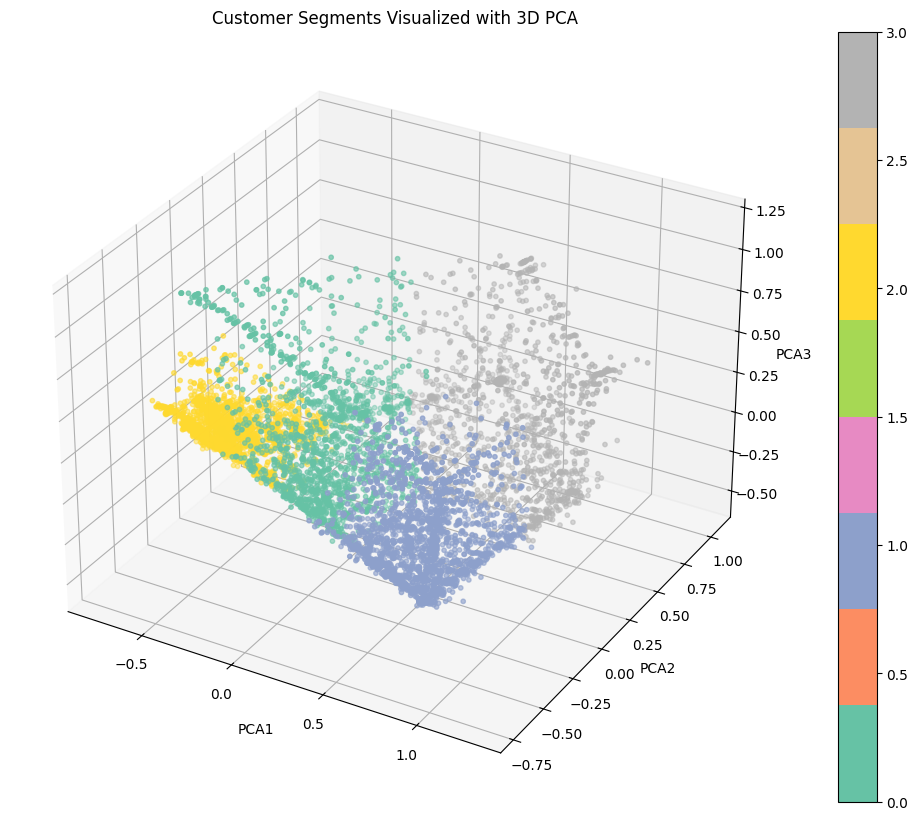

In [137]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PCA1'], df_pca['PCA2'], df_pca['PCA3'], 
                     c=df_pca['Cluster'], cmap='Set2', s=10)

# Add labels and title
ax.set_title('Customer Segments Visualized with 3D PCA')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.colorbar(scatter)
plt.show()

In [138]:
df['Cluster'] = df_pca['Cluster']
df_custom['Cluster'] = df_pca['Cluster']

In [139]:
df["Cluster"].value_counts()

Cluster
2    3703
1    2323
0    1722
3    1202
Name: count, dtype: int64

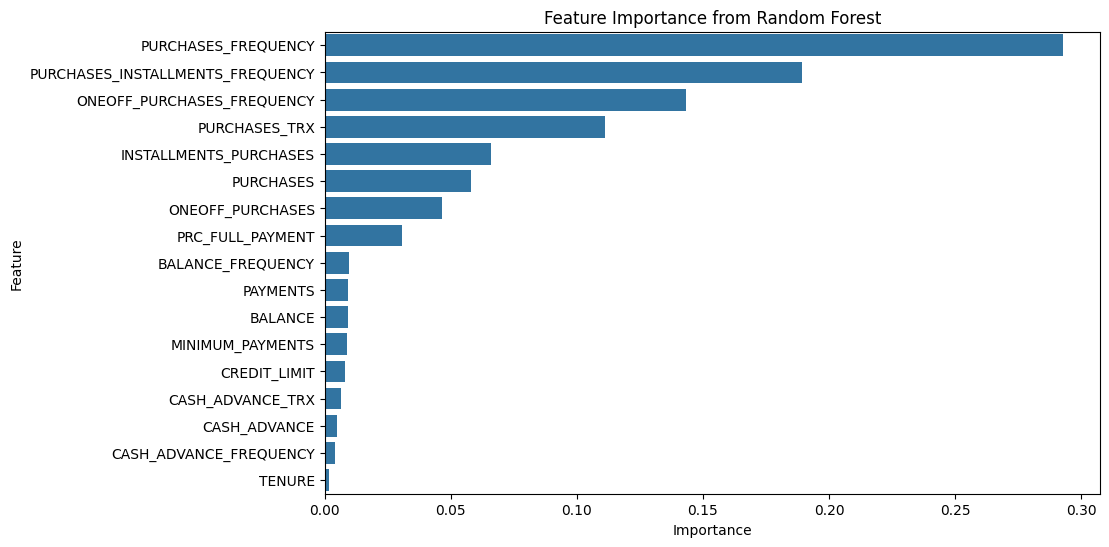

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns='Cluster')
y = df['Cluster']


model = RandomForestClassifier()
model.fit(X, y)

feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

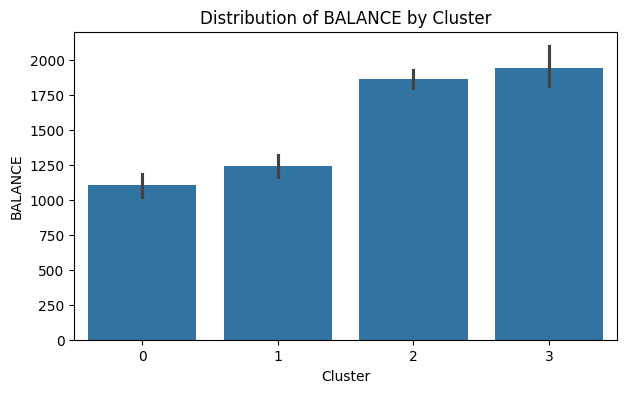

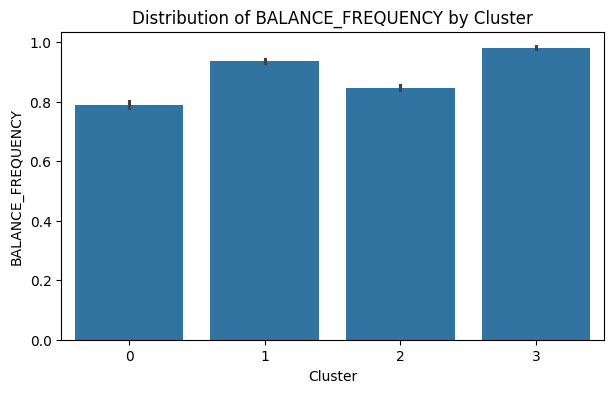

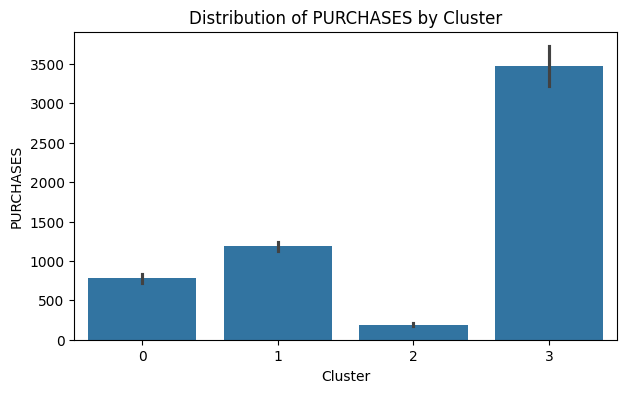

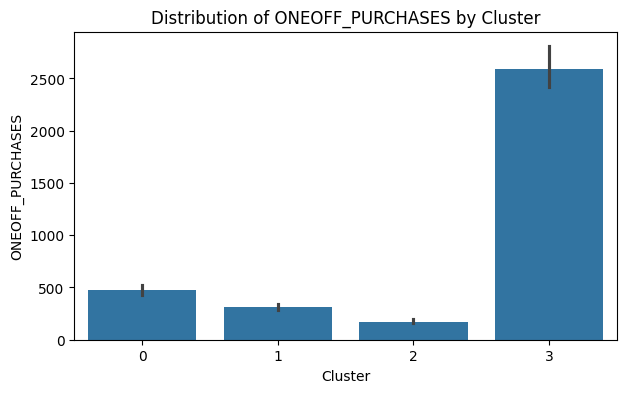

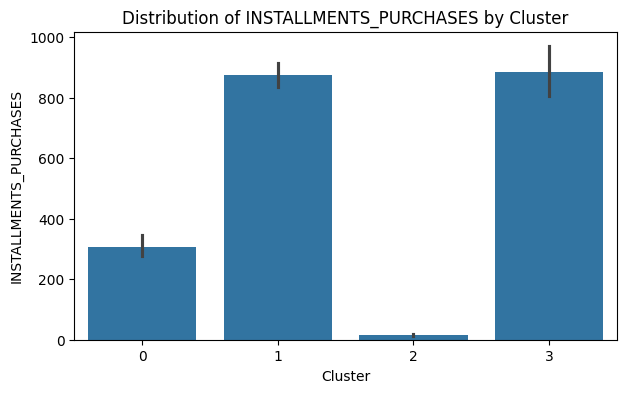

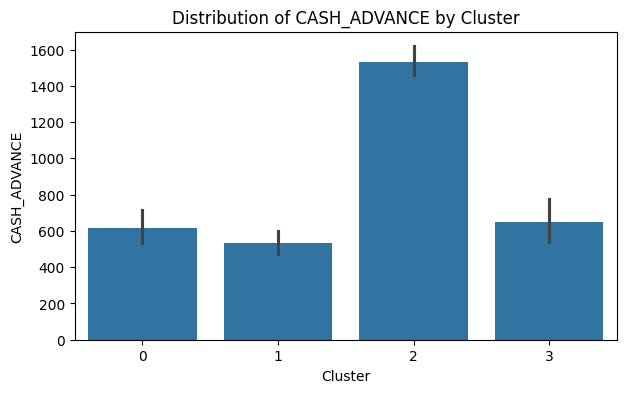

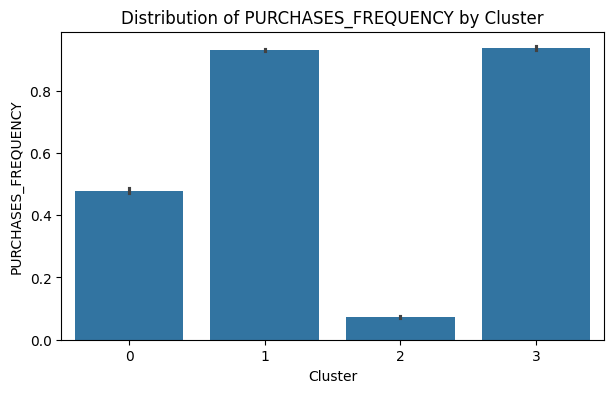

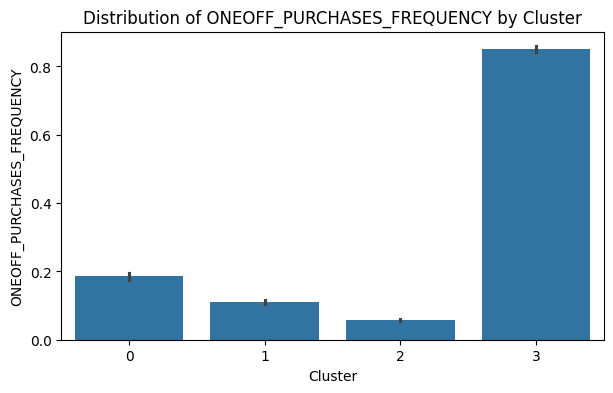

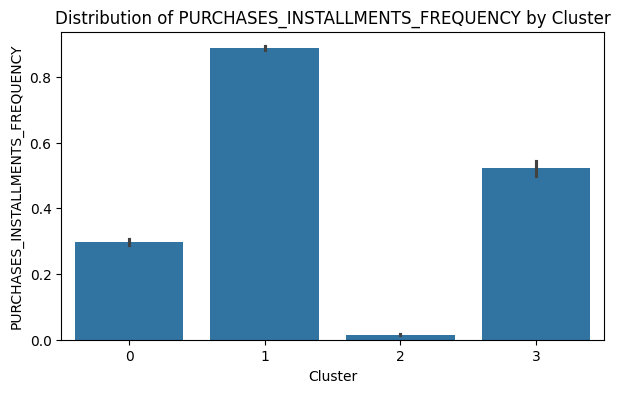

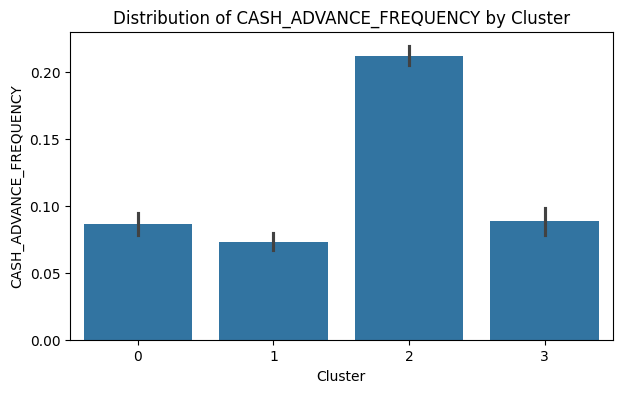

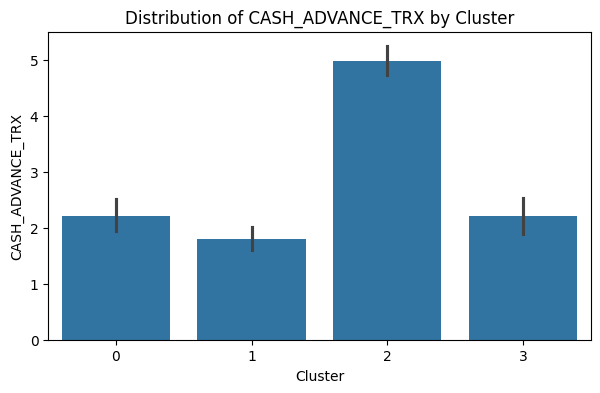

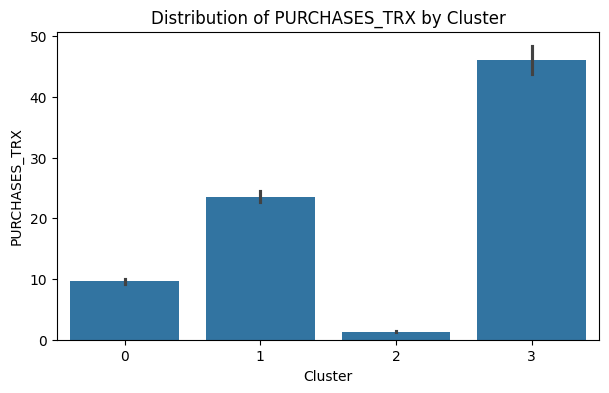

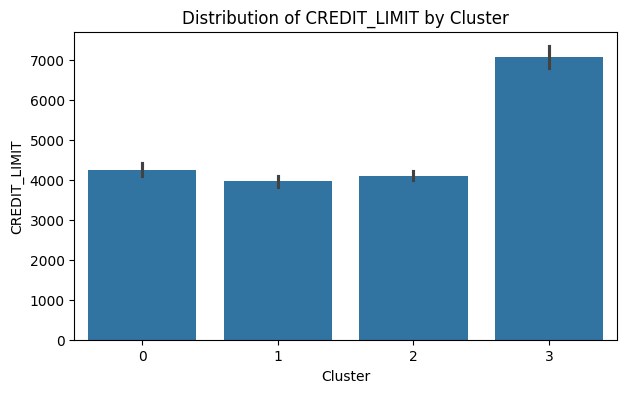

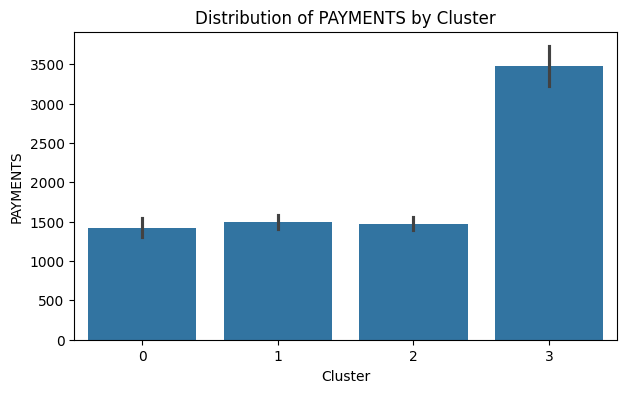

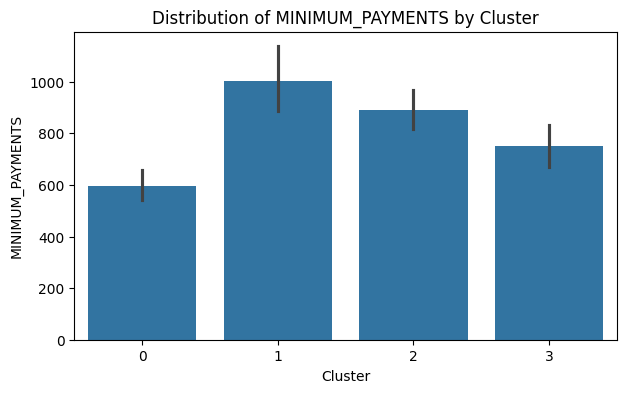

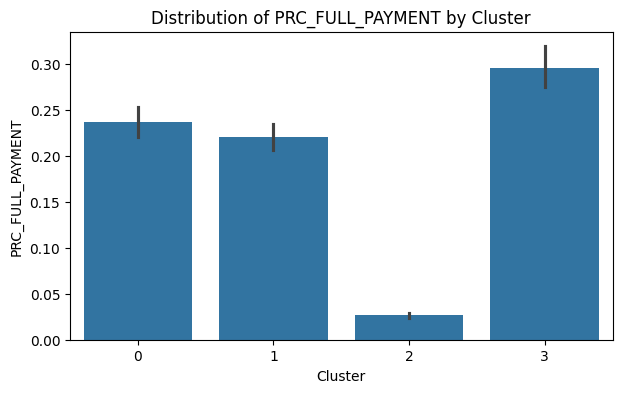

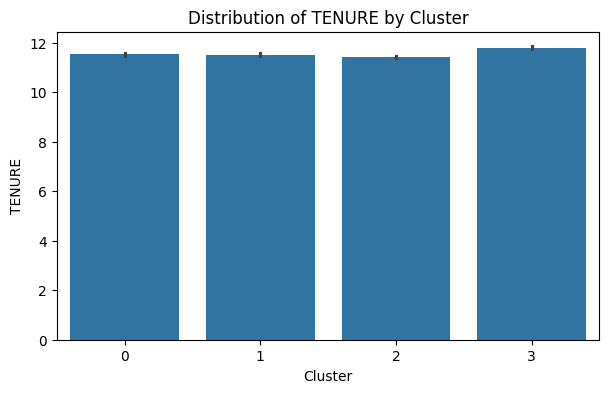

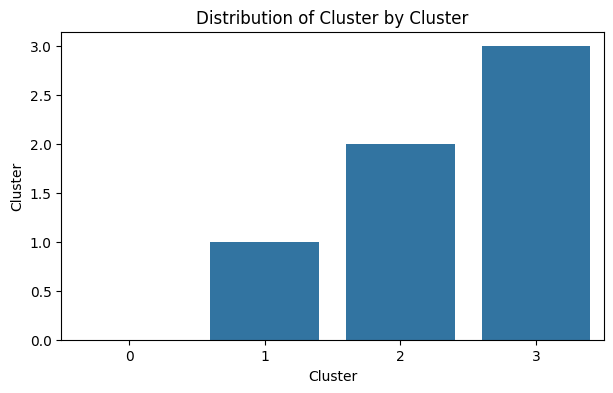

In [141]:

for column in df.columns:
    plt.figure(figsize=(7, 4))
    sns.barplot(x='Cluster', y=column, data=df)  
    plt.title(f'Distribution of {column} by Cluster')
    plt.show()

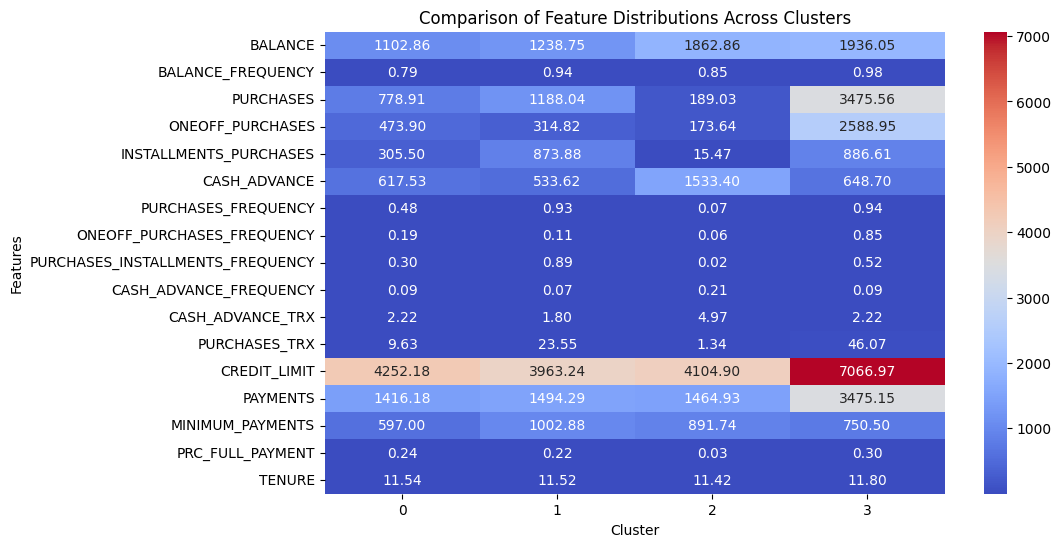

In [142]:
df_clustered_means = df.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(df_clustered_means.T, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Comparison of Feature Distributions Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()


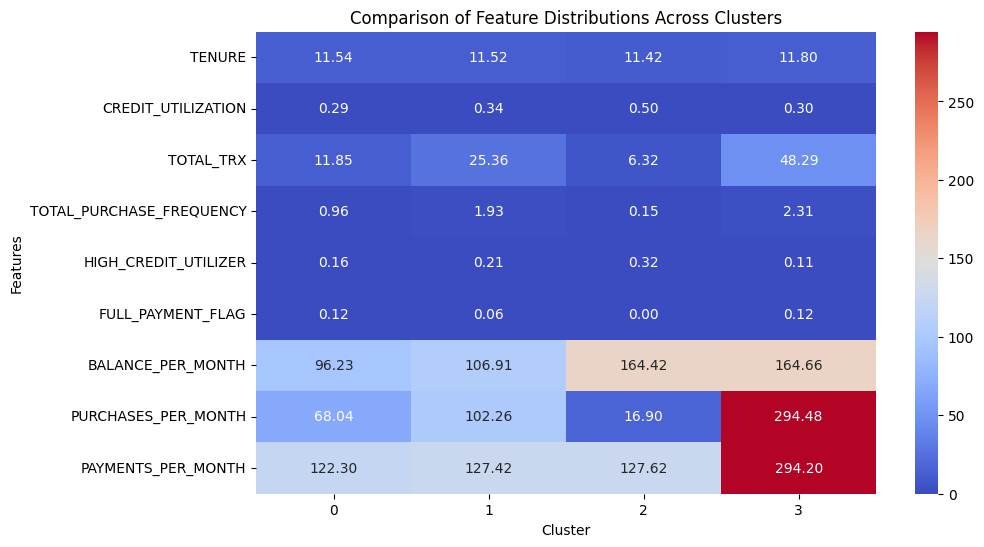

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

df_clustered_means = df_custom.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(df_clustered_means.T, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Comparison of Feature Distributions Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()


c:\Users\Yogi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


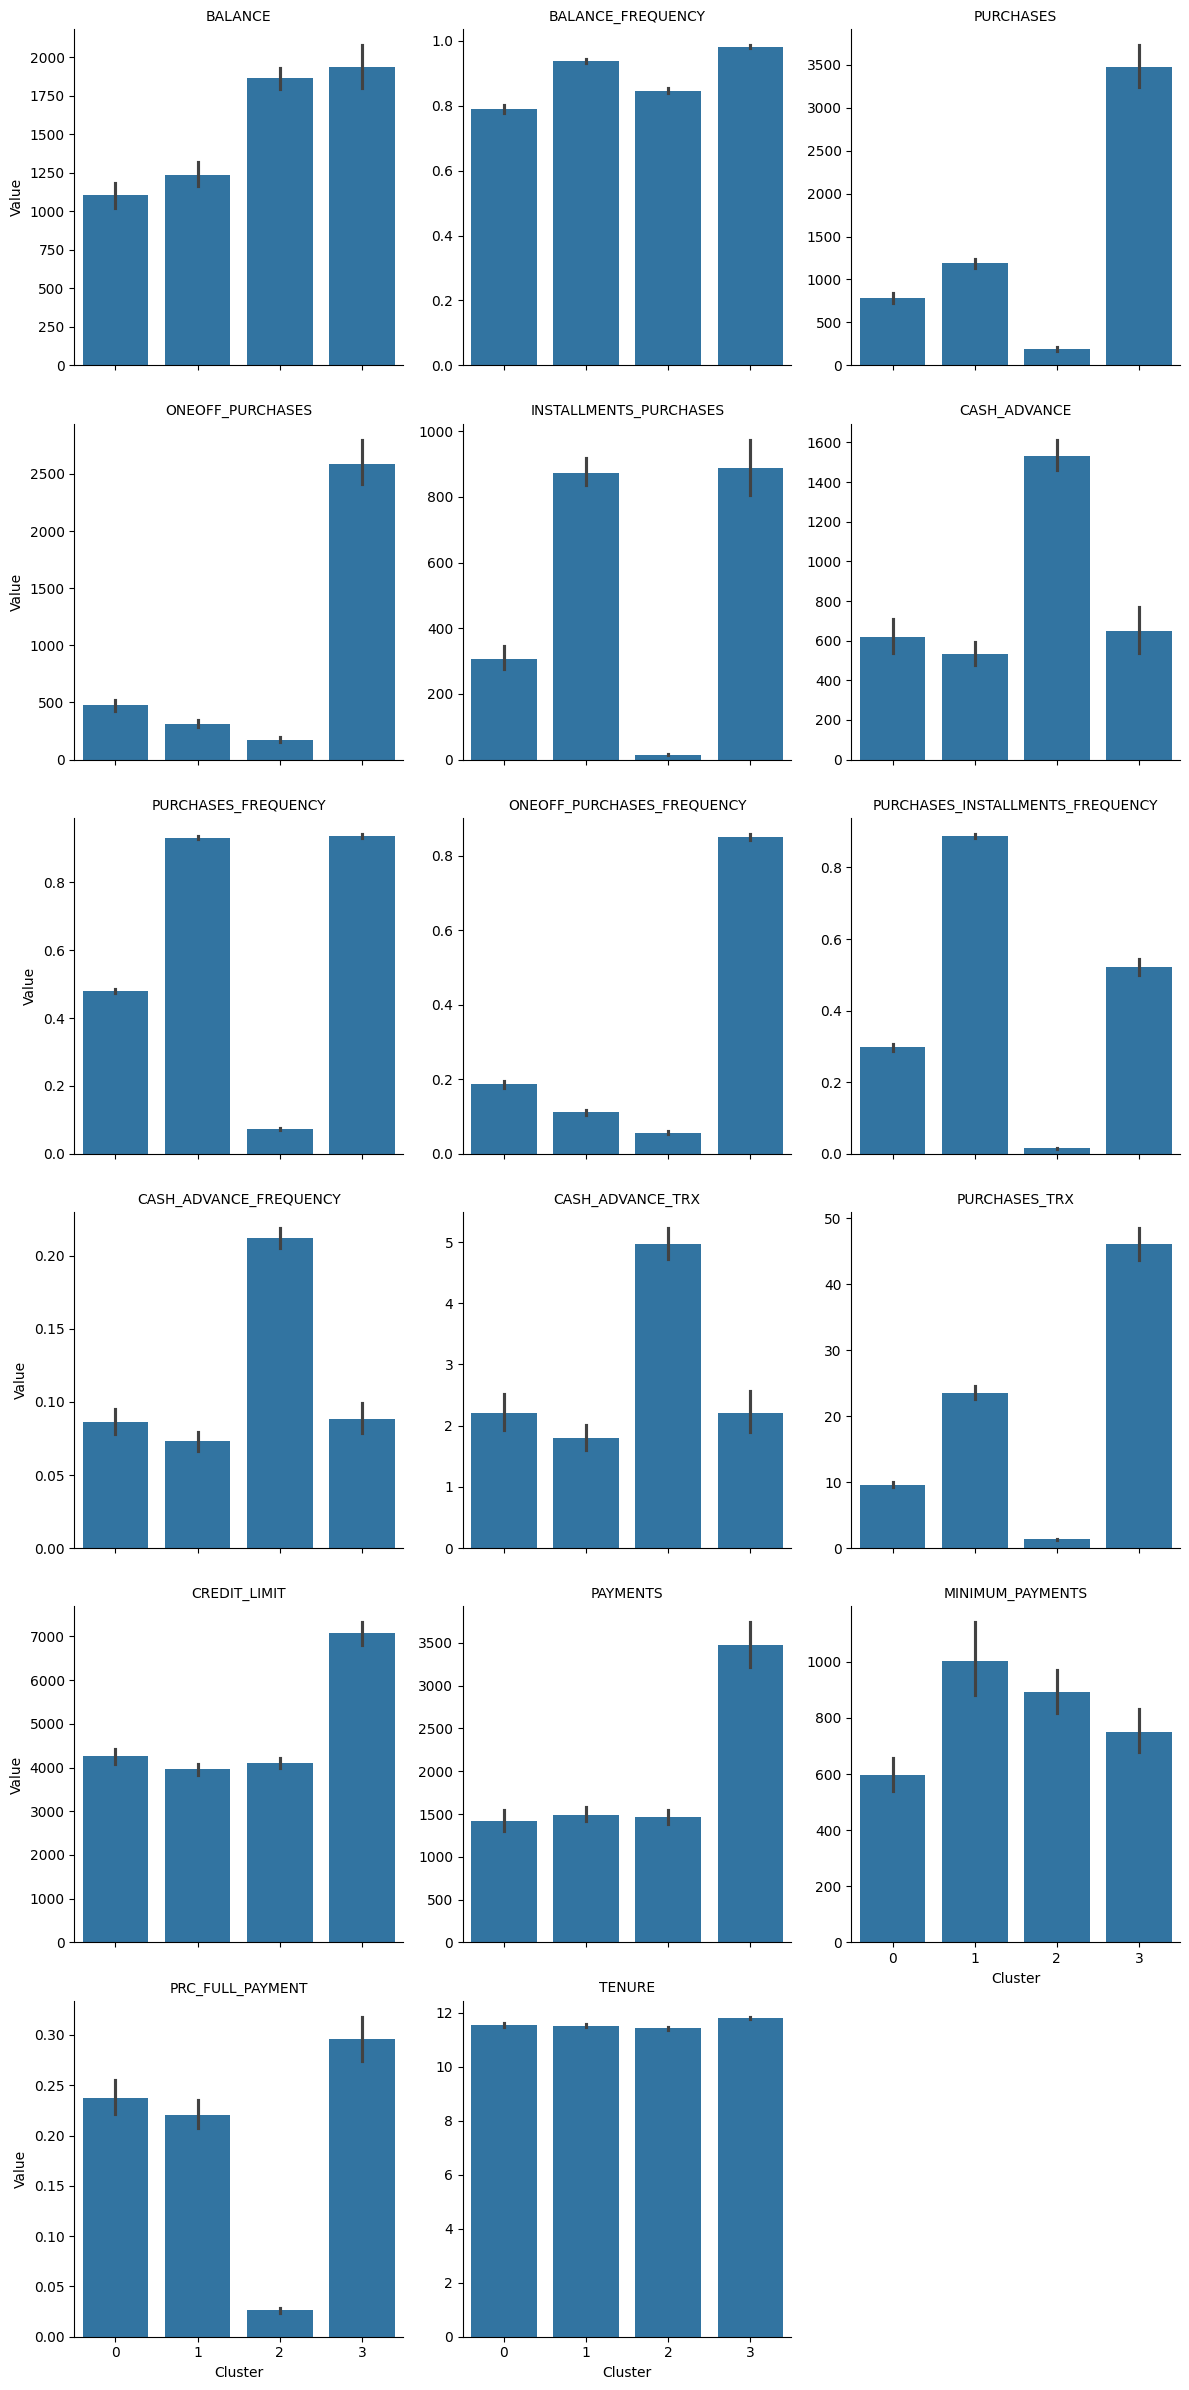

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Melt the dataframe to long format
df_melted = df.melt(id_vars='Cluster', var_name='Feature', value_name='Value')

# Set up the facet grid
g = sns.FacetGrid(df_melted, col='Feature', col_wrap=3, height=4, sharex=True, sharey=False)
g.map(sns.barplot, 'Cluster', 'Value')

# Set the titles and show the plot
g.set_titles(col_template='{col_name}')
plt.show()
